In [1]:
import sys
sys.path.append('C:\Anaconda3\Lib\site-packages')

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#import seaborn as sns
#sns.set_style('white')
#sns.set_context('poster')

## Monte Carlo sampling program

### Single walker algorithm starting from x, y = 0, 0

Metropolis algorithm using Markov chains.

In [2]:
def psi(x, y):
    ''' Our probability density function is the addition
        of two 2D Gaussians with different shape. '''
    g1 = mlab.bivariate_normal(x, y, 2.0, 2.0, -5, -5, 0)
    g2 = mlab.bivariate_normal(x, y, 0.5, 5.0, 10, 10, 0)
    return g1 + g2




            
def plot_samples(samples, psi, limits=[]):
    ''' Plot the results of our Monte Carlo
        sampling along with the underlying
        probability distribution psi. '''
    
    # set up a meshgrid - like labeling (x,y)
    # coordinates for each vertex on a piece
    # of graph paper
    dx = 0.1
    pad = 5
    if limits:
        xlow, xhigh = limits[0], limits[1]
        ylow, yhigh = limits[2], limits[3]
    else:
        xlow = np.min(samples)-pad 
        xhigh = np.max(samples)+pad
        ylow = np.min(samples)-pad
        yhigh = np.max(samples)+pad

    x = np.arange(xlow, xhigh, dx)
    y = np.arange(ylow, yhigh, dx)
    X, Y = np.meshgrid(x, y)

    # define Z as the value of the probability 
    # distribution psi at each 'vertex'
    # Z becomes a 2D Numpy array
    Z = psi(X, Y)
    
    # must be feeding in numpy arrays below
    plt.scatter(samples[:, 0], samples[:, 1],
                alpha=0.5, s=1)
    CS = plt.contour(X, Y, Z, 10)
    plt.clabel(CS, inline=1, fontsize=10)
    
    plt.xlim(xlow, xhigh)
    plt.ylim(ylow, yhigh)
    plt.xlabel('x', fontsize=20)
    plt.ylabel('y', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=15)
    
    

def Metroplis_algorithm(N, m, dr):
    ''' A Markov chain is constructed, using the
    Metropolis algorithm, that is comprised of
    samples of our probability density: psi(x,y).
       
    N - number of random moves to try
    m - will return a samples when i%m == 0
        in the loop over N
    dr - average size of moves (if uniform),
         controls the acceptance ratio '''
    
    # we'll want to return the average
    # acceptance ratio
    a_total = 0
    
    # sample locations will be stored in a list
    samples = []
    
    # get the starting configuration
    # and sample probability distribution
    # we'll start at r=(0,0)
    r_prime = np.zeros(2)
    p_prime = psi(r_prime[0], r_prime[1])
    
    for i in range(N):
        # propose a random move: r'-> r
        r = r_prime + np.random.uniform(-dr,dr,
                                        size=2)
        p = psi(r[0], r[1])
        
        # calculate the acceptance ratio
        # for the proposed move
        a = min(1, p/p_prime)
        a_total += a
        
        # check for acceptance
        p_prime, r_prime = check_move(p_prime, p,
                                      r_prime, r)
            
        if i%m == 0:
            samples.append(r)
    
    return np.array(samples), a_total/N*100.0




def check_move(p_prime, p, r_prime, r):
    ''' The move will be accepted or rejected
        based on the ratio of p/p_prime and a
        random number. '''
    
    if p/p_prime >= 1:
        # accept the move
        return p, r
    
    else:
        rand = np.random.uniform(0, 1)
        if p/p_prime + rand >= 1:
            # accept the move
            return p, r
        else:
            # reject the move
            return p_prime, r_prime
        
        
        
        

We took 5000 samples with an average acceptance ratio of 51.69%


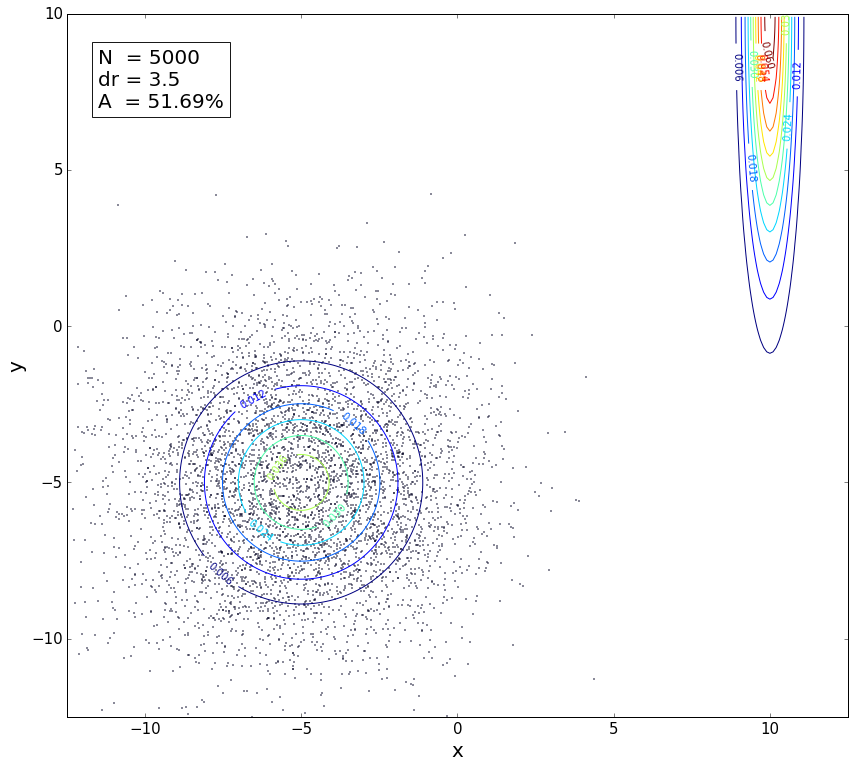

In [3]:
N, m, dr = 50000, 10, 3.5
samples, a = Metroplis_algorithm(N, m, dr)

print('We took {0:d} samples with an average acceptance ratio of {1:.2f}%'
      .format(len(samples), a))

box = dict(boxstyle='square', facecolor='white', alpha=0.9)

fig = plt.figure(figsize=(14,12.6))
plot_samples(samples, psi, [-12.5, 12.5, -12.5, 10])
#plt.xlim(-20, 20)
#plt.ylim(-20, 20)
plt.text(-11.5, 7, 'N  = {0:d} \ndr = {1:.1f} \nA  = {2:.2f}%'
                .format(len(samples), dr, a),
         fontsize=20, bbox=box)
plt.savefig('metropolis_sampling_1.png',
            bbox_inches = 'tight', dpi=144)
plt.show()

The problem is that a good choice for dr (to give A ~50%) is not large enough to span the gap between our distributions.  Because the first configuration in our Markov chain was r=(0, 0) the 'walker' got stuck in the circular probability density.  Perhaps by making dr larger we can properly sample both.

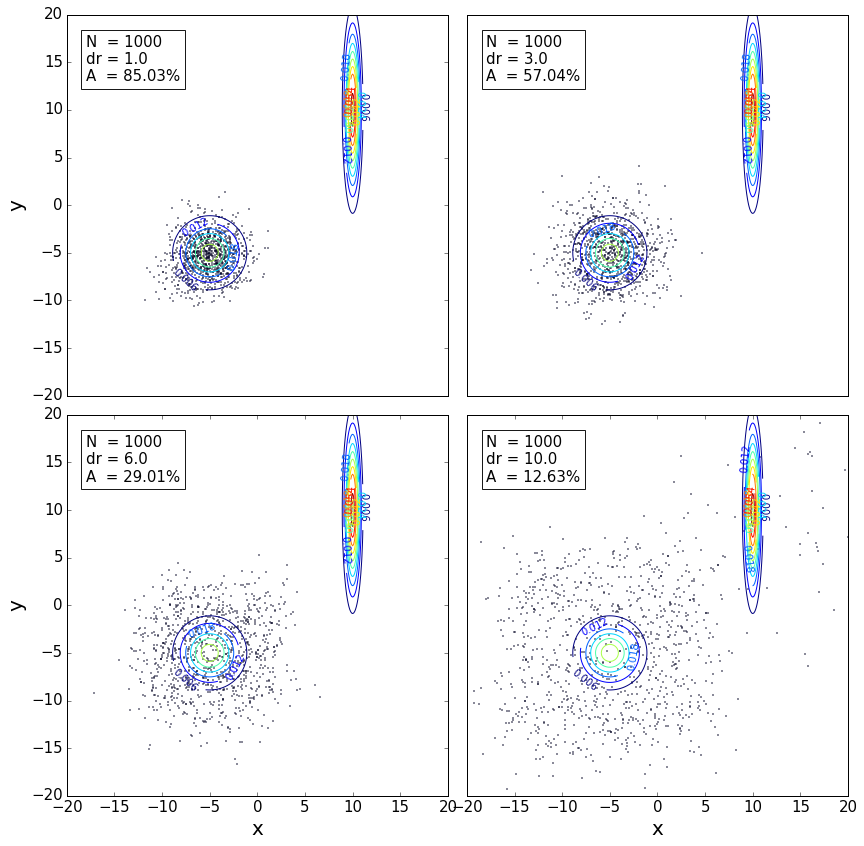

In [7]:
fig = plt.figure(figsize=(14,14))
box = dict(boxstyle='square', facecolor='white', alpha=0.9)

plt.subplot(221)
N, m, dr = 10000, 10, 1
samples, a = Metroplis_algorithm(N=N, m=m, dr=dr)
plot_samples(samples, psi, [-20, 20, -20, 20])
plt.text(-18, 13, 'N  = {0:d} \ndr = {1:.1f} \nA  = {2:.2f}%'
                .format(len(samples), dr, a),
         fontsize=15, bbox=box)
plt.xlabel('')
plt.xticks([])

plt.subplot(222)
N, m, dr = 10000, 10, 3
samples, a = Metroplis_algorithm(N=N, m=m, dr=dr)
plot_samples(samples, psi, [-20, 20, -20, 20])
plt.text(-18, 13, 'N  = {0:d} \ndr = {1:.1f} \nA  = {2:.2f}%'
                .format(len(samples), dr, a),
         fontsize=15, bbox=box)
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])

plt.subplot(223)
N, m, dr = 10000, 10, 6
samples, a = Metroplis_algorithm(N=N, m=m, dr=dr)
plot_samples(samples, psi, [-20, 20, -20, 20])
plt.text(-18, 13, 'N  = {0:d} \ndr = {1:.1f} \nA  = {2:.2f}%'
                .format(len(samples), dr, a),
         fontsize=15, bbox=box)

plt.subplot(224)
N, m, dr = 10000, 10, 10
samples, a = Metroplis_algorithm(N=N, m=m, dr=dr)
plot_samples(samples, psi, [-20, 20, -20, 20])
plt.text(-18, 13, 'N  = {0:d} \ndr = {1:.1f} \nA  = {2:.2f}%'
                .format(len(samples), dr, a),
         fontsize=15, bbox=box)
plt.ylabel('')
plt.yticks([])

plt.subplots_adjust(wspace=0.05)
plt.subplots_adjust(hspace=0.05)

plt.savefig('metropolis_acceptance_ratio.png',
            bbox_inches='tight', dpi=144)

plt.show()

Well that doesn't work very well.  As dr is increased the sampling distribution becomes larger and the acceptance ratio decreases.  In the bottom right pannel, the walker can span the gap between distibutions, however the sampling quality has degraded significantly.

### Multiple walkers with random starting locations

A better solution is to simulate multiple walkers and let each start from a random location within the sampling range.  In our case we start the walkers in between -20 and +20 on both the x and y axis.  This covers the same area shown in each of the 4 pannels of the figure above.

In [4]:
def Metroplis_algorithm_walkers(N, m, walkers, dr):
    ''' A Markov chain is constructed, using the
    Metropolis algorithm, that is comprised of
    samples of our probability density: psi(x,y).
       
    N - number of random moves to try
    m - will return a samples when i%m == 0
        in the loop over N
    walkers - number of unique Markov chains
    dr - average size of moves (if uniform),
         controls the acceptance ratio '''
    
    # we'll want to return the average
    # acceptance ratio
    a_total = 0
    
    # sample locations will be stored in a list
    samples = []
    
    # get the starting configuration
    # and sample probability distribution
    # we'll start at a randomly
    # selected position for each walker
    r_prime = [np.random.uniform(-10, 15, size=2) for w in range(walkers)]
    p_prime = [psi(r_prime[w][0], r_prime[w][1])
               for w in range(walkers)]
    
    # initialize lists
    r = [np.zeros(2) for w in range(walkers)]
    p = [np.zeros(1) for w in range(walkers)]
    
    for i in range(N):
        for w in range(walkers):
            # propose a random move: r'-> r
            r[w] = r_prime[w] + np.random.uniform(-dr,dr,
                                                  size=2)
            p[w] = psi(r[w][0], r[w][1])
        
            # calculate the acceptance ratio
            # for the proposed move
            a = min(1, p[w]/p_prime[w])
            # update the total
            a_total += a
            
            # check for acceptance
            p_prime[w], r_prime[w] = check_move(p_prime[w], p[w],
                                                r_prime[w], r[w])
            
            if i%m == 0:
                samples.append(r[w])
    
    return np.array(samples), a_total/N/walkers*100.0

def check_move(p_prime, p, r_prime, r):
    ''' The move will be accepted or rejected
        based on the ratio of p/p_prime and a
        random number. '''
    
    if p/p_prime >= 1:
        # accept the move
        return p, r
    
    else:
        rand = np.random.uniform(0, 1)
        if p/p_prime + rand >= 1:
            # accept the move
            return p, r
        else:
            # reject the move
            return p_prime, r_prime

We took 5000 samples with an average acceptance ratio of 52.48%


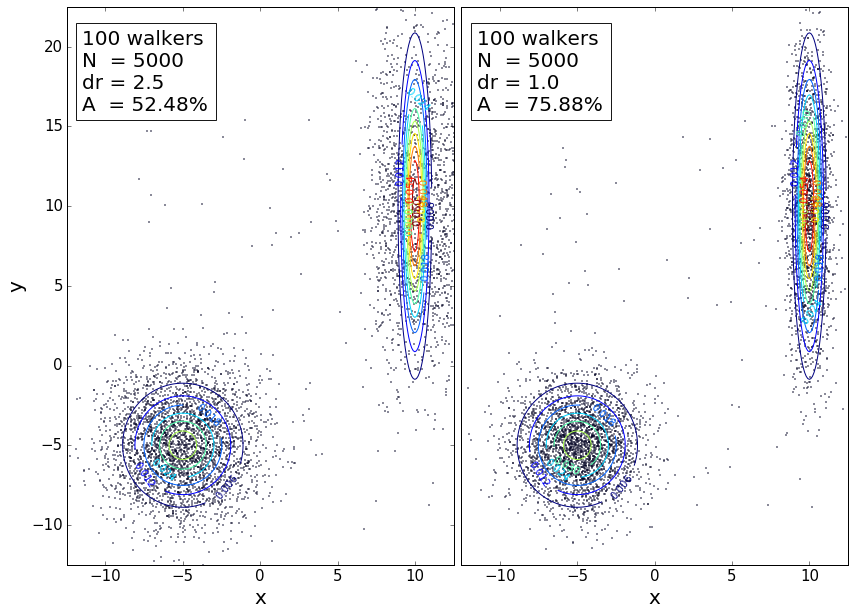

In [5]:
N, m, walkers, dr = 5000, 100, 100, 2.5
samples, a = Metroplis_algorithm_walkers(N, m, walkers, dr)

print('We took {0:d} samples with an average acceptance ratio of {1:.2f}%'
      .format(len(samples), a))

box = dict(boxstyle='square', facecolor='white', alpha=0.9)

fig = plt.figure(figsize=(14,10))

plt.subplot(121)
plot_samples(samples, psi, [-12.5, 12.5, -12.5, 22.5])
plt.text(-11.5, 16, '{0:d} walkers \nN  = {1:d} \ndr = {2:.1f} \nA  = {3:.2f}%'
                .format(walkers, len(samples), dr, a),
         fontsize=20, bbox=box)

plt.subplot(122)
dr = 1.0
samples, a = Metroplis_algorithm_walkers(N, m, walkers, dr)
plot_samples(samples, psi, [-12.5, 12.5, -12.5, 22.5])
plt.text(-11.5, 16, '{0:d} walkers \nN  = {1:d} \ndr = {2:.1f} \nA  = {3:.2f}%'
                .format(walkers, len(samples), dr, a),
         fontsize=20, bbox=box)
plt.ylabel('')
plt.yticks([])

plt.subplots_adjust(wspace=0.02)

plt.savefig('metropolis_sampling_random_start.png',
            bbox_inches = 'tight', dpi=144)
plt.show()

### Neat looking plots

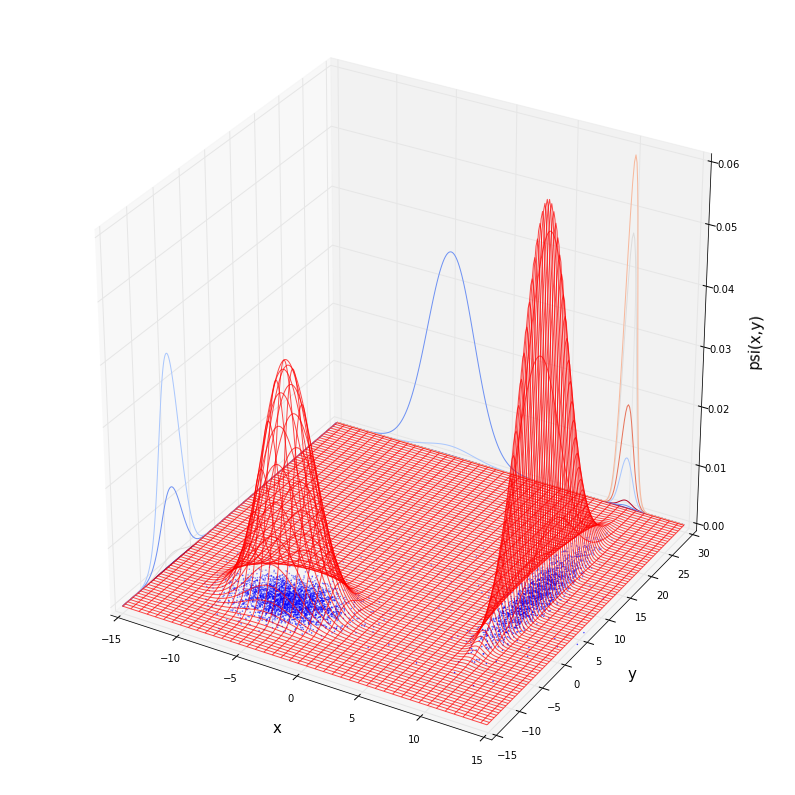

In [107]:
fig = plt.figure(figsize=(14,14))
ax = fig.gca(projection='3d')
#ax = fig.add_subplot(111, projection='3d')

x1, x2 = -15, 15
y1, y2 = -15, 30

# set up a meshgrid - like labeling (x,y) coordinates
# for each vertex on a piece of graph paper
dx = 0.1
pad = 5
x = np.arange(x1, x2, dx)
y = np.arange(y1, y2, dx)
X, Y = np.meshgrid(x, y)

# define Z as the value of the probability 
# distribution q at each 'vertex'
# Z becomes a 2D Numpy array
Z = psi(X, Y)

# plot
ax.plot_wireframe(X,Y,Z, rstride=5, cstride=7,
                  color='r', alpha=0.7)
ax.scatter(samples[:, 0], samples[:, 1], color='b', s=0.2)

# make it pretty (as found in Axes3D.contour documentation)
#cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=y2, cmap=cm.coolwarm)

cset = ax.contour(X, Y, Z, zdir='x', offset=x1, cmap=cm.coolwarm)

# define the limits
ax.set_xlabel('x', labelpad=15, fontsize=15)
ax.set_xlim(x1, x2)
ax.set_ylabel('y', labelpad=15, fontsize=15)
ax.set_ylim(y1, y2)
ax.set_zlabel('psi(x,y)', labelpad=15, fontsize=15)
ax.set_zlim(0, 0.06)

#ax.view_init(elev=20, azim=-45)

plt.savefig('pretty_plot_metropolis_sampling.png', bbox_inches='tight', dpi=144)

plt.show()